## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# ^^ importing pandas for anaylyzing the data, path to read in our CSV, and matplot to create visuals

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

# Creating a dataframe for our bitstamp data, named it 'bitstamp_df' read in the csv file and set index to Timestamp

bitstamp_df = pd.read_csv(Path('./Resources/bitstamp.csv'), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# calling the first 5 rows of the DF
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters


#Created our coinbase DF

coinbase_df = pd.read_csv(Path('./Resources/coinbase.csv'), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# calling the last 5 rows of the DF
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
#dropping all nan values in bistamp df
bitstamp_df = bitstamp_df.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $

#removing '$' from close columns
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$","")

<ipython-input-8-ee8829bb082a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$","")


In [9]:
#checking if '$' where removed.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
#checking number of duplicates
bitstamp_df.duplicated().sum()

0

In [12]:
#dropping duplicates
bitstamp_df = bitstamp_df.drop_duplicates()

In [13]:
#rechecking number of duplicates
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [14]:
#dropping na values in coinbase_df
coinbase_df = coinbase_df.dropna()

In [15]:
#removing '$' from close columns
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$","")

<ipython-input-15-d5ef46931ae7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$","")


In [16]:
#checking if '$' where removed
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [17]:
# Convert the Close data type to a float
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")

In [18]:
# Review the data for duplicate values, and drop them if necessary
#checking number of duplicates
coinbase_df.duplicated().sum()

0

In [19]:
#dropping duplicates
coinbase_df = coinbase_df.drop_duplicates()

In [20]:
#rechecking number of duplicates
coinbase_df.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [21]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64

In [22]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
#generating a df of close prices from february 1st to march 1st of 2018
coinbase_sliced = coinbase_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [23]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [24]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp closed price'}, xlabel='Timestamp'>

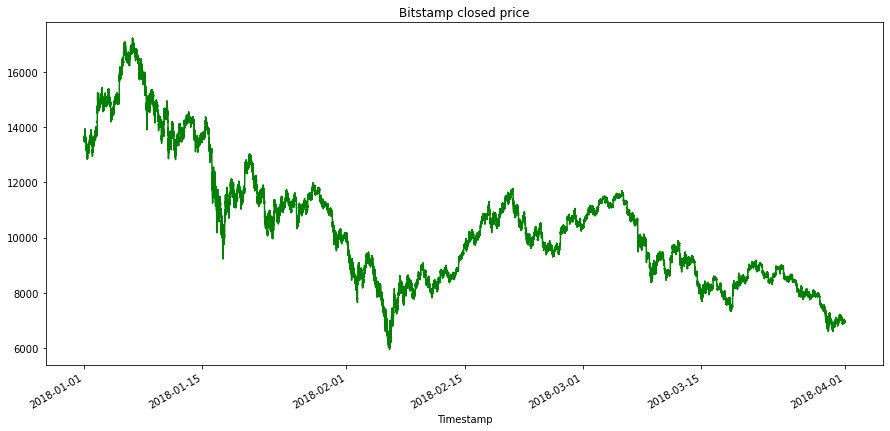

In [25]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind="line", title="Bitstamp closed price", color="green", figsize=(15, 7))

<AxesSubplot:title={'center':'Coinbase closed price'}, xlabel='Timestamp'>

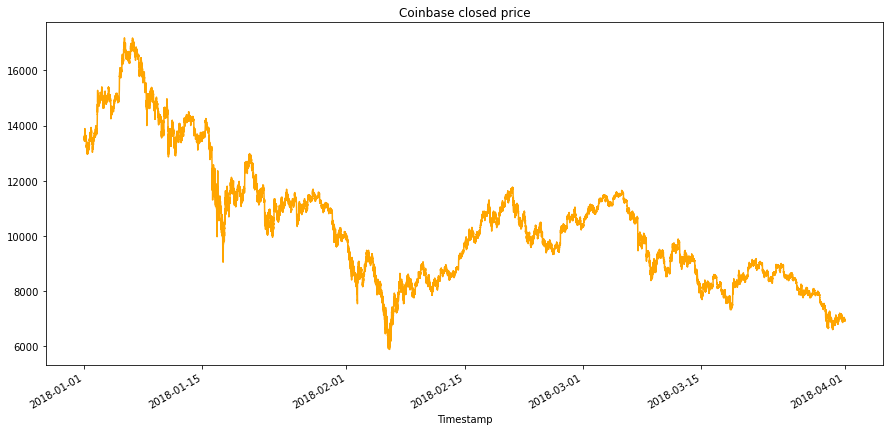

In [26]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind="line", title="Coinbase closed price", color="orange", figsize=(15,7))

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close'}, xlabel='Timestamp'>

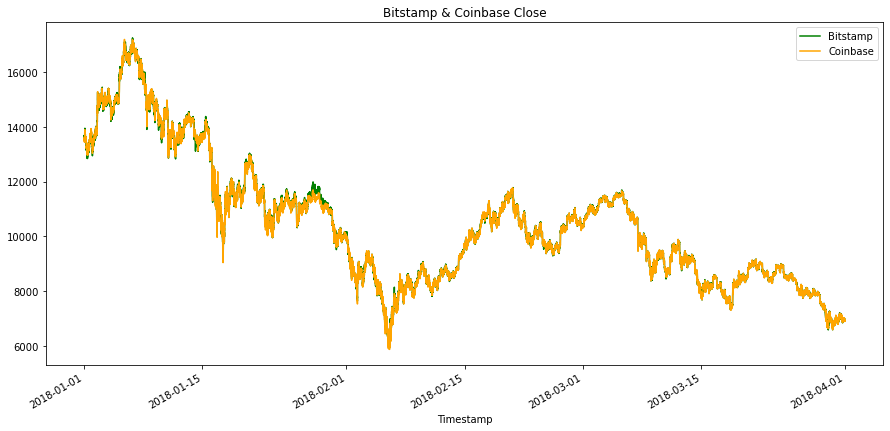

In [27]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, kind="line", title="Bitstamp & Coinbase Close", color="green", label="Bitstamp", figsize=(15,7))
coinbase_sliced.plot(legend=True, kind="line", color="orange", label="Coinbase", figsize=(15,7))

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close from 02/01/18 - 03/01/18'}, xlabel='Timestamp'>

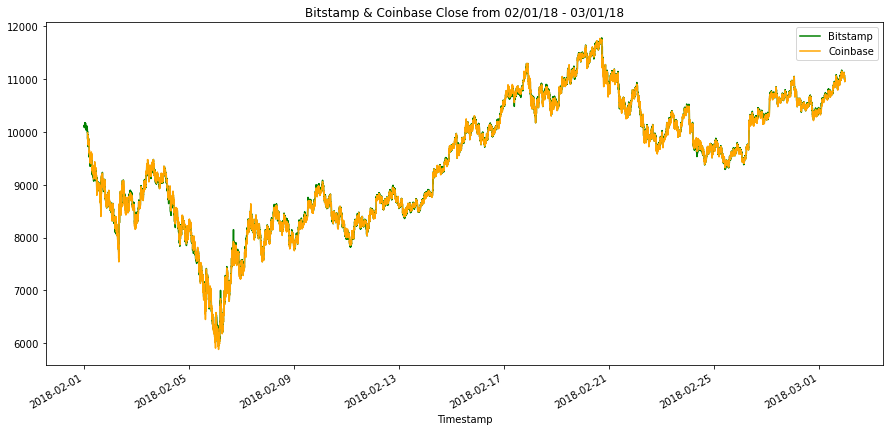

In [28]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc["2018-02-01":"2018-03-01"].plot(legend=True, kind="line", title="Bitstamp & Coinbase Close from 02/01/18 - 03/01/18", color="green", label="Bitstamp", figsize=(15,7))
coinbase_sliced.loc["2018-02-01":"2018-03-01"].plot(legend=True, kind="line", color="orange", label="Coinbase", figsize=(15,7))

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close from 03/01/18 - 04/01/18'}, xlabel='Timestamp'>

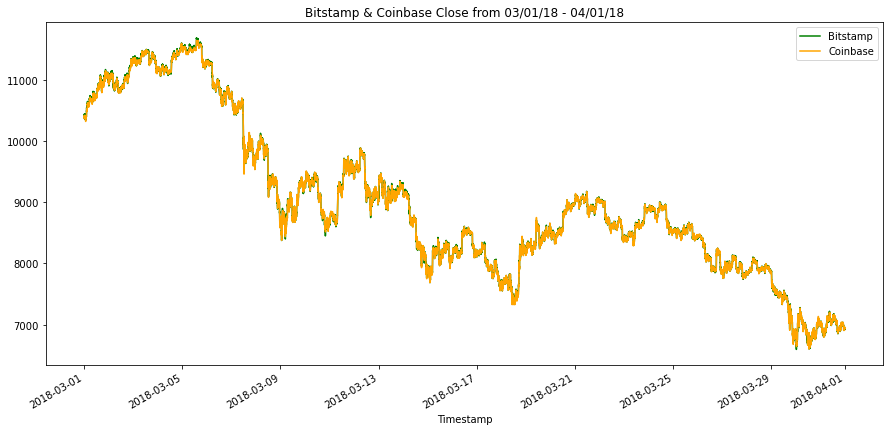

In [29]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc["2018-03-01":"2018-04-01"].plot(legend=True, kind="line", title="Bitstamp & Coinbase Close from 03/01/18 - 04/01/18", color="green", label="Bitstamp", figsize=(15,7))
coinbase_sliced.loc["2018-03-01":"2018-04-01"].plot(legend=True, kind="line", color="orange", label="Coinbase", figsize=(15,7))

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
#bitstamp early
bitstamp_early = bitstamp_sliced.loc["2018-01-16"]
bitstamp_early.describe()

count     1440.000000
mean     11763.118694
std        694.123446
min      10172.020000
25%      11299.990000
50%      11730.175000
75%      12156.400000
max      13229.560000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp 01/16/18'}>

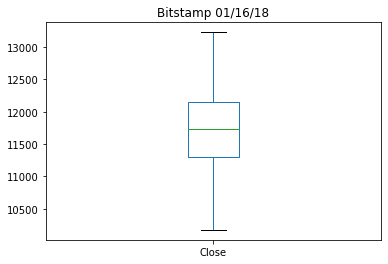

In [31]:
bitstamp_early.plot(kind="box", title="Bitstamp 01/16/18")

In [32]:
#bitstamp middle
bitstamp_middle = bitstamp_sliced.loc["2018-02-01"]
bitstamp_middle.describe()

count     1438.000000
mean     10069.267719
std        198.403690
min       9711.000000
25%       9925.000000
50%      10057.550000
75%      10150.022500
max      10600.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp 02/16/18'}>

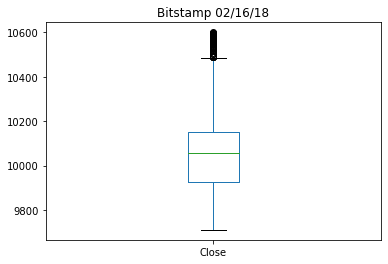

In [33]:
#plotting middle statistics for bitstamp
bitstamp_middle.plot(kind="box", title="Bitstamp 02/01/18")

In [34]:
#bitstamp end
bitstamp_end = bitstamp_sliced.loc["2018-03-01"]
bitstamp_end.describe()

count    1436.000000
mean     8332.999714
std       162.799498
min      8035.810000
25%      8194.402500
50%      8273.360000
75%      8503.512500
max      8608.240000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp 03/16/18'}>

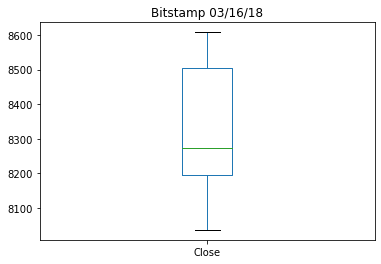

In [35]:
#bitstamp end plot
bitstamp_end.plot(kind="box", title="Bitstamp 03/01/18")

In [36]:
#coinbase early
coinbase_early = coinbase_sliced.loc["2018-01-16"]
coinbase_early.describe()

count     1419.000000
mean     11791.307942
std        705.032969
min       9969.000000
25%      11299.615000
50%      11744.010000
75%      12201.205000
max      13239.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase 01/16/18'}>

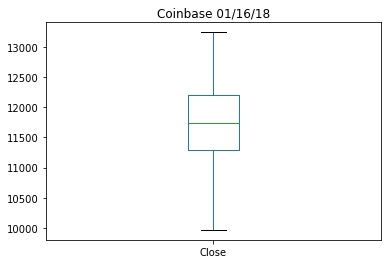

In [37]:
#plotting coinbase early statistics
coinbase_early.plot(kind="box",title="Coinbase 01/16/18")

In [38]:
#coinbase middle
coinbase_middle = coinbase_sliced.loc["2018-02-01"]
coinbase_middle.describe()

count     1440.000000
mean     10058.352771
std        191.193085
min       9730.240000
25%       9925.157500
50%      10050.000000
75%      10130.000000
max      10588.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase 02/16/18'}>

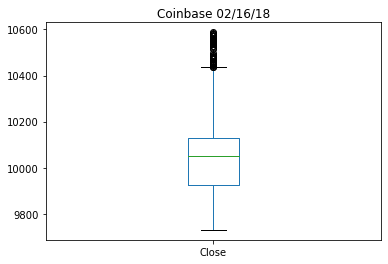

In [39]:
#plotting coinbase middle statistics
coinbase_middle.plot(kind="box",title="Coinbase 02/16/18")

In [40]:
#coinbase end
coinbase_end = coinbase_sliced.loc["2018-03-16"]
coinbase_end.describe()
                    

count    1440.000000
mean     8328.036799
std       165.134018
min      8038.160000
25%      8186.000000
50%      8268.185000
75%      8507.060000
max      8600.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase 03/16/18'}>

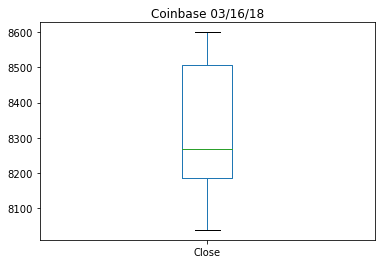

In [41]:
#plotting coinbase end statistics
coinbase_end.plot(kind="box",title="Coinbase 03/16/18")

In [42]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp_early - coinbase_early
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean      -23.212135
std        67.789186
min      -606.800000
25%       -52.355000
50%       -22.280000
75%         8.330000
max       275.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread from 01/16/18'}>

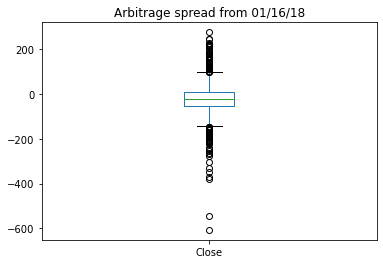

In [43]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title="Arbitrage spread from 01/16/18")

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close from 02/16/18'}, xlabel='Timestamp'>

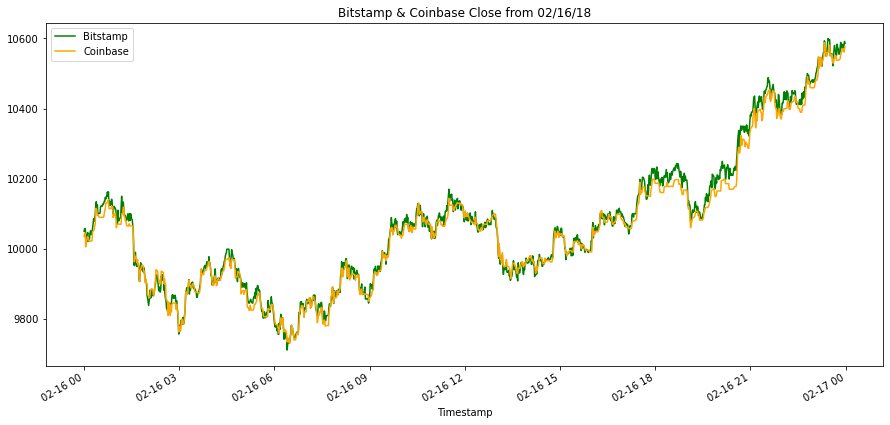

In [61]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_middle.plot(legend=True, kind="line", title="Bitstamp & Coinbase Close from 02/16/18", color="green", label="Bitstamp", figsize=(15,7))
coinbase_middle.plot(legend=True, kind="line", color="orange", label="Coinbase", figsize=(15,7))

In [45]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_middle - coinbase_middle

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1438.00000
mean       10.82217
std        16.94882
min       -56.00000
25%        -1.11000
50%        10.07500
75%        21.47250
max        65.05000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrtage spread from 02/16/18'}>

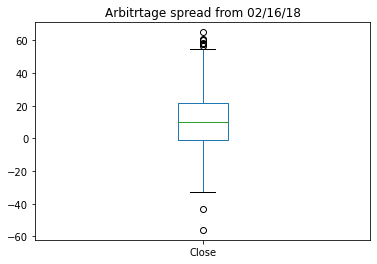

In [62]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrtage spread from 02/16/18")

<AxesSubplot:title={'center':'Bitstamp & Coinbase Close from 03/16/18'}, xlabel='Timestamp'>

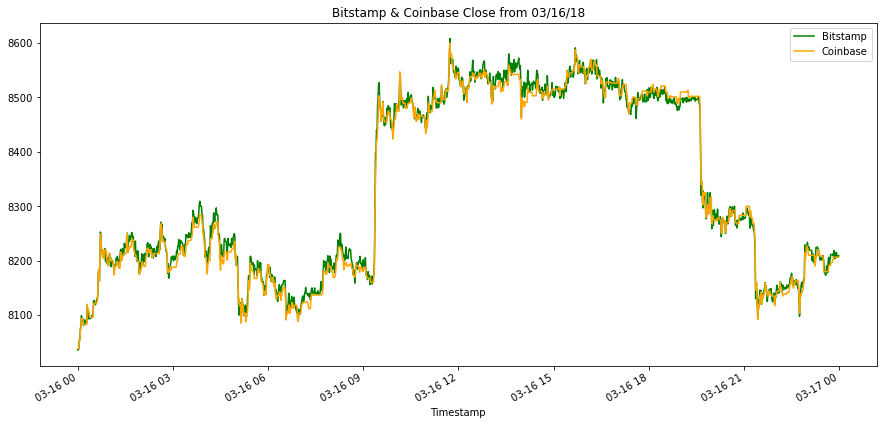

In [63]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_end.plot(legend=True, kind="line", title="Bitstamp & Coinbase Close from 03/16/18", color="green", label="Bitstamp", figsize=(15,7))
coinbase_end.plot(legend=True, kind="line", color="orange", label="Coinbase", figsize=(15,7))

In [48]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_end - coinbase_end

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1436.000000
mean        4.529143
std        11.066311
min       -29.930000
25%        -3.020000
50%         4.020000
75%        12.275000
max        53.570000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread from 03/16/18'}>

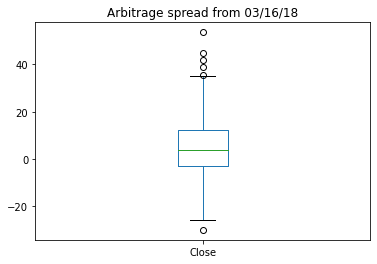

In [64]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title="Arbitrage spread from 03/16/18")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [50]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
early_data = arbitrage_spread_early[arbitrage_spread_early > 0]
early_data.describe()

count    451.000000
mean      40.645477
std       47.387457
min        0.010000
25%       10.010000
50%       26.830000
75%       49.330000
max      275.920000
Name: Close, dtype: float64

In [65]:
# comparing middle arbitrage stats to see whats greater than 0 adding to middl_data variable
middle_data = arbitrage_spread_middle[arbitrage_spread_middle > 0]
middle_data.describe()

count    1039.000000
mean       18.456487
std        12.919400
min         0.130000
25%         8.400000
50%        15.940000
75%        26.220000
max        65.050000
Name: Close, dtype: float64

In [52]:
#comparing late data to see which is greater than 0 than adding to variable

late_data = arbitrage_spread_late[arbitrage_spread_late > 0]
late_data.describe()

count    937.000000
mean      10.776884
std        7.705699
min        0.010000
25%        4.440000
50%        9.780000
75%       15.450000
max       53.570000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [53]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = early_data / bitstamp_early

# Review the spread return DataFrame
spread_return_early.describe()

count    4.510000e+02
mean     3.555678e-03
std      4.199141e-03
min      8.130068e-07
25%      8.517522e-04
50%      2.316943e-03
75%      4.264410e-03
max      2.358291e-02
Name: Close, dtype: float64

In [54]:
# calculating the return from the spread
spread_return_middle = middle_data / bitstamp_middle
spread_return_middle.describe()

count    1039.000000
mean        0.001817
std         0.001258
min         0.000013
25%         0.000830
50%         0.001569
75%         0.002575
max         0.006343
Name: Close, dtype: float64

In [55]:
#calculating the late data returned spread
spread_return_late = late_data / bitstamp_end
spread_return_late.describe()

count    937.000000
mean       0.001297
std        0.000923
min        0.000001
25%        0.000533
50%        0.001181
75%        0.001879
max        0.006379
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [56]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2018-01-16 07:39:00    0.010235
2018-01-16 08:43:00    0.013353
2018-01-16 08:44:00    0.012916
2018-01-16 08:45:00    0.012845
2018-01-16 08:46:00    0.017394
Name: Close, dtype: float64

In [73]:
#seeing what days returned a 10% return
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [58]:
#seeing what days returned a 10% return
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [59]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    36.000000
mean      0.015459
std       0.003705
min       0.010235
25%       0.012794
50%       0.014705
75%       0.017719
max       0.023583
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [68]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 07:39:00    124.56
2018-01-16 08:43:00    158.91
2018-01-16 08:44:00    153.10
2018-01-16 08:45:00    152.18
2018-01-16 08:46:00    207.82
2018-01-16 08:47:00    214.26
2018-01-16 08:48:00    170.03
2018-01-16 08:49:00    155.02
2018-01-16 08:50:00    190.45
2018-01-16 08:51:00    229.71
2018-01-16 08:52:00    247.04
2018-01-16 08:53:00    219.35
2018-01-16 08:54:00    160.96
2018-01-16 08:55:00    275.92
2018-01-16 08:56:00    192.98
2018-01-16 08:57:00    131.17
2018-01-16 08:58:00    222.15
2018-01-16 08:59:00    163.98
2018-01-16 09:00:00    192.00
2018-01-16 09:01:00    121.33
2018-01-16 09:02:00    142.52
2018-01-16 09:04:00    135.86
2018-01-16 14:04:00    134.66
2018-01-16 16:35:00    138.26
2018-01-16 16:36:00    170.86
2018-01-16 16:37:00    247.61
2018-01-16 16:38:00    179.66
2018-01-16 17:04:00    177.97
2018-01-16 17:08:00    114.32
2018-01-16 17:09:00    110.00
2018-01-16 17:17:00    132.19
2018-01-16 17:18:00    183.43
2018-01-16 17:28:00    149.99


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [69]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     36.000000
mean     174.062222
std       41.263561
min      110.000000
25%      141.455000
50%      167.005000
75%      201.947500
max      275.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Protifable arbitrage trades from 1/16/18'}, xlabel='Timestamp'>

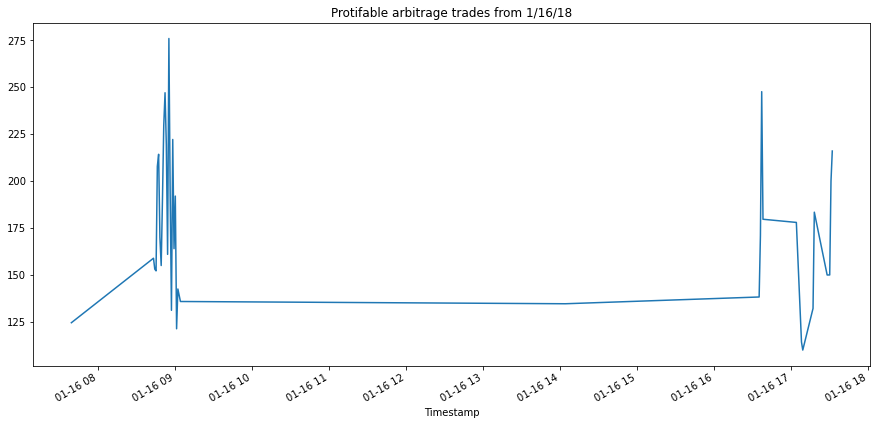

In [72]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(kind="line", title="Protifable arbitrage trades from 1/16/18", figsize=(15,7))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [74]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

6266.24

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [79]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.head()

Timestamp
2018-01-16 07:39:00    124.56
2018-01-16 08:43:00    283.47
2018-01-16 08:44:00    436.57
2018-01-16 08:45:00    588.75
2018-01-16 08:46:00    796.57
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum of Profits'}, xlabel='Timestamp'>

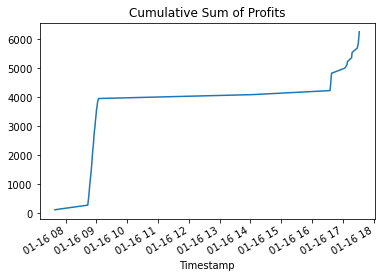

In [80]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(kind="line", title="Cumulative Sum of Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** It seems like bitstamp was clearly the cheaper exchange. I only saw profitable trades from my early data 1/16/18, there where 36 profitable trades that day. seems like at the end of the day was the most profitable.